# K-Means Algorithm

# 📘 K-Means Clustering – Math

## Objective

Given a dataset \( X = \{x_1, x_2, \ldots, x_n\} \subset \mathbb{R}^d \), and number of clusters \( K \), the goal is to partition the data into \( K \) disjoint clusters \( C_1, C_2, \ldots, C_K \) to minimize the **within-cluster sum of squares (WCSS)**:

$$
\underset{C_1, \ldots, C_K}{\arg\min} \sum_{k=1}^{K} \sum_{x_i \in C_k} \|x_i - \mu_k\|^2
$$

Where:

- \( \mu_k \) is the **centroid** (mean) of cluster \( C_k \):

$$
\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$

---

## Lloyd's Algorithm

1. **Initialize**:
   - Choose \( K \) random points \( \mu_1, \ldots, \mu_K \in X \) as initial centroids.

2. **Assignment Step**:
   - Assign each point \( x_i \) to the nearest centroid:

$$
c_i = \arg\min_k \|x_i - \mu_k\|^2
$$

3. **Update Step**:
   - Update each centroid based on the mean of its assigned points:

$$
\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$

4. **Repeat**:
   - Until centroids converge or assignments no longer change.

---

## Notes

- K-means is **not convex**, so it may converge to a **local minimum**.
- **Initialization is critical** — K-Means++ often improves stability.
- Time complexity: \( \mathcal{O}(n \cdot k \cdot d) \) per iteration.

# [Code from Scratch]

In [1]:
import numpy as np

def kmeans(X, k, max_iters=100, tol=1e-4):
    n, d = X.shape
    # Randomly initialize k centroids
    centroids = X[np.random.choice(n, k, replace=False)]
    for i in range(max_iters):
        # Compute distances: (n x k) matrix
        '''
        This is a vectorized distance computation. Let's break it down:

				X[:, np.newaxis]: Converts X from shape (n, d) to (n, 1, d) so that broadcasting works.
				
				X[:, np.newaxis] - centroids: This computes pairwise differences between each point and each centroid, giving shape (n, k, d).
				
				np.linalg.norm(..., axis=2): Computes Euclidean norm along the last axis, i.e., across dimensions. The result is a distance matrix of shape (n, k).
				
				✅ Each entry [i, j] is the distance from point x_i to centroid μ_j.
        '''
        dists = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        # Assign clusters
        labels = np.argmin(dists, axis=1)
        # Update centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        # Convergence check
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return centroids, labels

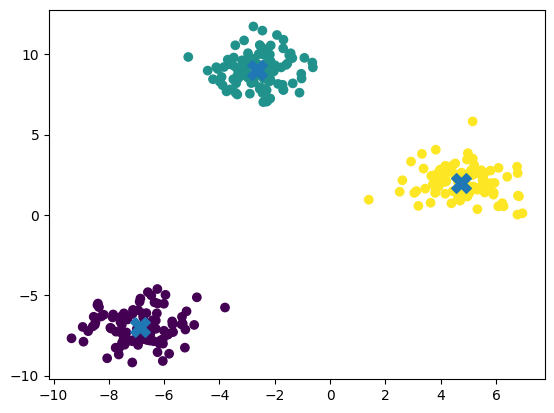

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)
centroids, labels = kmeans(X, k=3)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], s=200, marker='X')
plt.show()

# [Code with sklearn]

In [3]:
from sklearn.cluster import KMeans

kmeans_sklearn = KMeans(n_clusters=3, n_init='auto')
kmeans_sklearn.fit(X)

print("Inertia:", kmeans_sklearn.inertia_)  # Sum of squared distances

Inertia: 566.859551124413


# Follow-up: Optimizations


optimized version of K-Means that includes:

1. Random initialization of centroids (already implemented, but we’ll clarify)

2. Early stopping when centroids don’t change significantly

3. Vectorization for speed


In [4]:
def kmeans_optimized(X, k, max_iters=100, tol=1e-4, verbose=False):
    """
    Optimized K-Means clustering using random init, early stopping, and vectorization.

    Parameters:
        X: np.ndarray of shape (n_samples, n_features)
        k: int - number of clusters
        max_iters: int - maximum number of iterations
        tol: float - tolerance for convergence
        verbose: bool - if True, print debug info

    Returns:
        centroids: np.ndarray of shape (k, n_features)
        labels: np.ndarray of shape (n_samples,)
    """
    n_samples, n_features = X.shape

    # --------------------------
    # 1. Random initialization
    # --------------------------
    rng = np.random.default_rng()
    centroids = X[rng.choice(n_samples, size=k, replace=False)]

    for i in range(max_iters):
        # --------------------------
        # 2. Vectorized distance computation
        # --------------------------
        # Shape: (n_samples, k)
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)

        # --------------------------
        # 3. Assignment step
        # --------------------------
        labels = np.argmin(distances, axis=1)

        # --------------------------
        # 4. Update centroids
        # --------------------------
        new_centroids = np.array([
            X[labels == j].mean(axis=0) if np.any(labels == j) else centroids[j]
            for j in range(k)
        ])

        # --------------------------
        # 5. Early stopping
        # --------------------------
        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if verbose:
            print(f"Iteration {i+1}, shift: {centroid_shift:.6f}")
        if centroid_shift < tol:
            break

        centroids = new_centroids

    return centroids, labels